<a id='feature-correlation'></a>
<font size="+7" color='#780404'><b> Loan Approval Prediction by team Pandas</b></font>  

<center><img src ="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*1BWK7tvR6_UZwcmaCQWvBQ.jpeg" width = "750" height = '500'/>

<a id='feature-correlation'></a>
<font size="+5" color='#780404'><b> Importing Libraries</b></font>  

In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pip install plotly

In [7]:
pip install termcolor

In [8]:
pip install sklearn

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('ggplot') #Applying style to graphs
import termcolor #for customization of text
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# plt.style.use('ggplot') #Applying style to graphs
# import termcolor #for customization of text
# from sklearn.model_selection import train_test_split
# from sklearn.svm import LinearSVC, SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

<center><img src ="https://i.stack.imgur.com/sGHia.png" width = "800" height = '500' alt="unsplash.com"/>

<a id='feature-correlation'></a>
<font size="+6" color='#780404'><b> Loading Data</b></font>  

In [10]:
df = pd.read_csv("/content/loan_approval_data.csv")

In [11]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

<a id='feature-correlation'></a>
<font size="+3" color='#780404'><b> Data Preprocessing</b></font>

In [12]:
#lets have a look at the dataset again

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
df["education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
#checking the datatypes of each column
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

- all datatypes in our dataset are appropriate, so there is no need to change the datatypes of any columns.

In [15]:
# Check for null values in each dataset
nulls = df.isnull().values.any()

# Print the results
print("Null values in our dataset:", nulls)

Null values in our dataset: False


- clearly there are no nulls in our dataset.

 <a id='feature-correlation'></a>
<font size="+5" color='#780404'><b> Exploratory Data Analysis</b></font>  

In [16]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [17]:
#checking the description of the object datatype columns
df.describe(include= 'O')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


- Most clients in our dataset had their loans approved, and most of the clients in our dataset were self employed and most of these clients in this dataset are actually the graduates.

In [18]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [19]:
df["loan_status"].describe()

count         4269
unique           2
top       Approved
freq          2656
Name: loan_status, dtype: object

In [20]:
df.shape

(4269, 13)

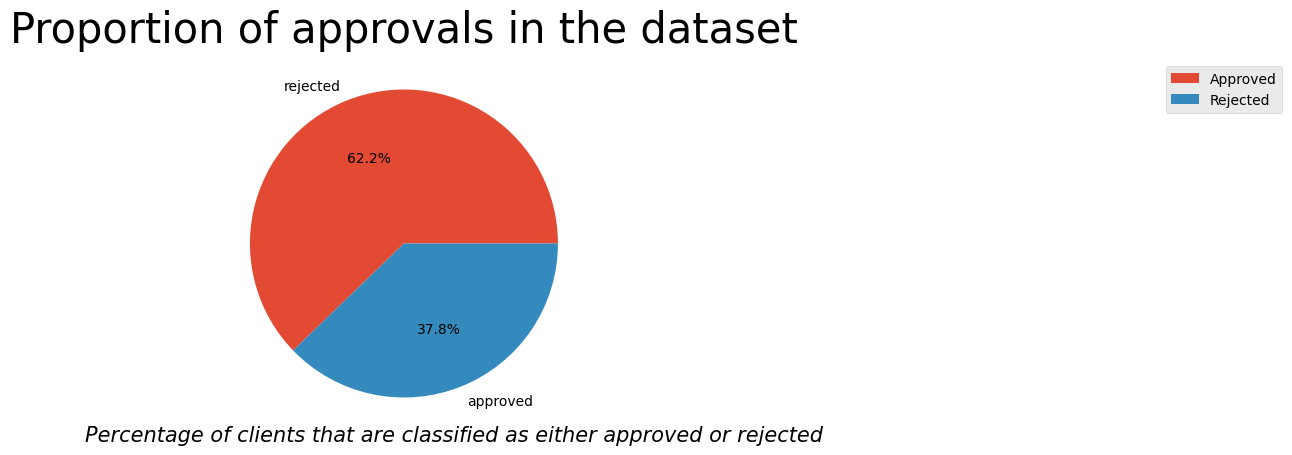

In [21]:
# Plot the proportion of default in dataset
plot1 = plt.figure(figsize=(15,5))
names = ['rejected','approved']
perc =df['loan_status'].replace({1: 'approved', 0:'rejected'}).value_counts()
perc.name = ''
perc.plot(kind='pie', labels=names, autopct='%1.1f%%')
plt.title('Proportion of approvals in the dataset', fontsize = 30)
plt.figtext(0.30, 0.1, 'Percentage of clients that are classified as either approved or rejected',
            horizontalalignment ='left', fontsize = 15, style='italic')
plt.legend(df['loan_status'].replace({0:'rejected', 1:'approved'}).value_counts().index,
           bbox_to_anchor=(2.8,0.9), loc="right")

plt.show()

In [22]:
def plot_percentage(df, x):
    sns.set(style="darkgrid")

    # create the bar chart
    ax = sns.barplot(y=df.index, x="Percentage", orient = 'h', data=df)

    # set the chart title and axis labels
    plt.title("Percentage distribution of " + x)
    plt.ylabel(x)
    plt.xlabel("Percentage")

    # add percentage values on top of each bar
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=8, rotation='horizontal')

    # rotate the x-axis labels
    #plt.xticks(rotation='horizontal')

    # show the chart
    plt.show()

In [23]:
def count_percentage(df, column):
    counts = df[column].value_counts()
    percentages = counts / counts.sum() * 100
    _df = pd.concat([counts, percentages], axis=1)
    _df.columns = ['Count', 'Percentage']
    _df = _df.sort_values(by='Percentage', ascending=False)
    _df = _df[_df['Count'] >= 0]
    return _df

In [24]:
df.describe(include = 'O')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [25]:
education_df = count_percentage(df, 'education')
self_employed_df = count_percentage(df, 'self_employed')
loan_status_df = count_percentage(df, 'loan_status')

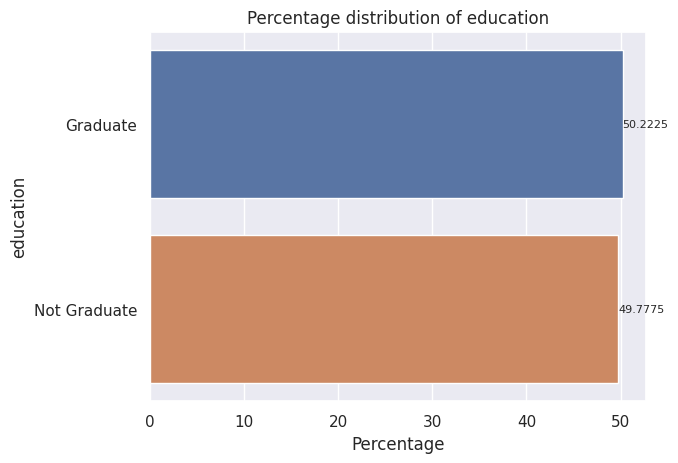

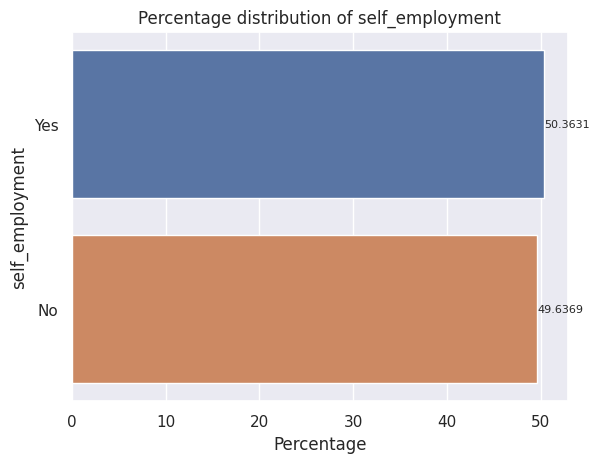

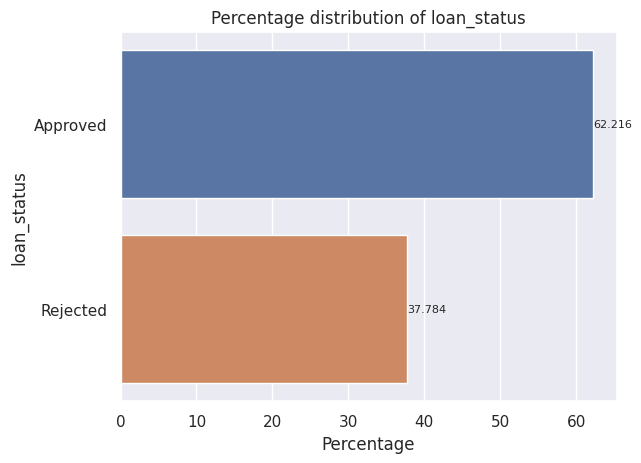

In [26]:
plot_percentage(education_df, 'education')
plot_percentage(self_employed_df, 'self_employment')
plot_percentage(loan_status_df,'loan_status')


<ipython-input-27-3ce0e24db3f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

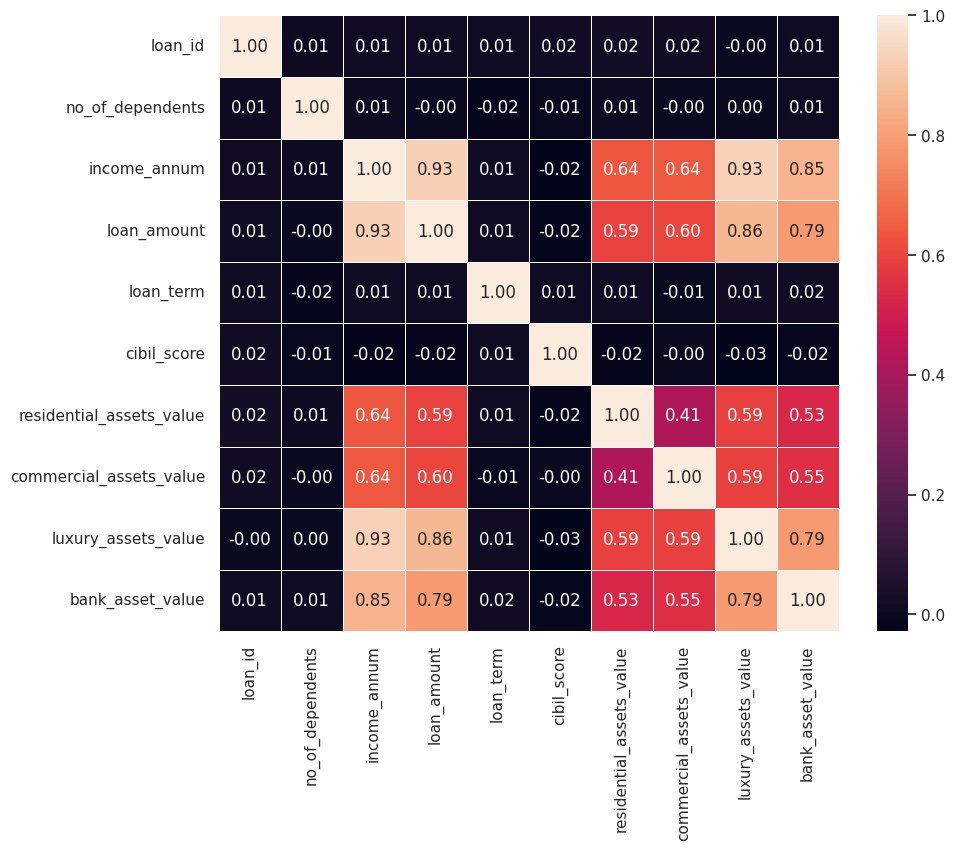

In [27]:
corr_matrix = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths= 0.5)

In [28]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

<a id='data-transformation'></a>
<font size="+3" color='#780404'><b> Data Transformation</b></font>  
<a id='modeling'></a>

In [29]:
 #Defining  mapping dictionaries
education_mapping = {'Not Graduate': 0, 'Graduate': 1}
self_employed_mapping = {'No': 0, 'Yes': 1}
loan_status_mapping = {'Rejected': 0, 'Approved': 1}

# Applying the mappings to the DataFrame
df['education'] = df['education'].map(education_mapping)
df['self_employed'] = df['self_employed'].map(self_employed_mapping)
df['loan_status'] = df['loan_status'].map(loan_status_mapping)

In [30]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


<Axes: >

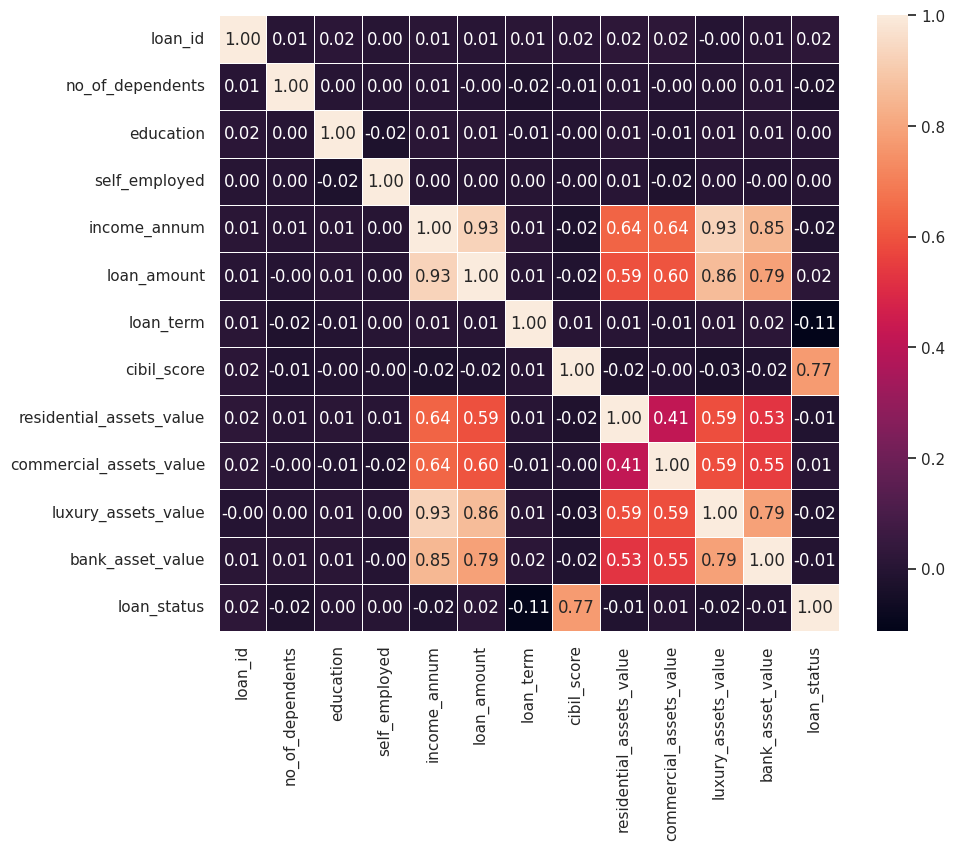

In [31]:
corr_matrix = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths= 0.5)

In [32]:
from sklearn.model_selection import train_test_split


In [52]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

<a id='Deep Learning'></a>
<font size="+3" color='#780404'><b> Data Splitting </b></font>  
<a id='modeling'></a>


In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [37]:
# Split the data into features and target
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='Deep Learning'></a>
<font size="+3" color='#780404'><b> Deep-Learning Approach: Neural Networks </b></font>  
<a id='modeling'></a>

In [40]:
import tensorflow as tf

<a id='Deep Learning'></a>
<font size="+2" color='#780404'><b>Setting up the layers </b></font>  
<a id='modeling'></a>

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(34, activation='relu'),
    tf.keras.layers.Dense(1)
])

<a id='Deep Learning'></a>
<font size="+2" color='#780404'><b> Compiling the model </b></font>  
<a id='modeling'></a>

In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a id='Deep Learning'></a>
<font size="+2" color='#780404'><b> Training the model </b></font>  
<a id='modeling'></a>

In [43]:
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
107/107 [==============================] - 3s 5ms/step - loss: 0.5187 - accuracy: 0.8196
Epoch 2/20
107/107 [==============================] - 1s 5ms/step - loss: 0.2529 - accuracy: 0.9089
Epoch 3/20
107/107 [==============================] - 1s 5ms/step - loss: 0.2308 - accuracy: 0.9189
Epoch 4/20
107/107 [==============================] - 1s 5ms/step - loss: 0.2029 - accuracy: 0.9286
Epoch 5/20
107/107 [==============================] - 1s 5ms/step - loss: 0.1820 - accuracy: 0.9359
Epoch 6/20
107/107 [==============================] - 1s 5ms/step - loss: 0.1691 - accuracy: 0.9400
Epoch 7/20
107/107 [==============================] - 1s 5ms/step - loss: 0.1599 - accuracy: 0.9441
Epoch 8/20
107/107 [==============================] - 1s 5ms/step - loss: 0.1529 - accuracy: 0.9470
Epoch 9/20
107/107 [==============================] - 1s 5ms/step - loss: 0.1563 - accuracy: 0.9517
Epoch 10/20
107/107 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9567

<a id='Deep Learning'></a>
<font size="+2" color='#780404'><b> Model Evaluation </b></font>  
<a id='modeling'></a>

In [44]:
test_loss, test_acc = model.evaluate(X_test_scaled,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

27/27 - 1s - loss: 0.1301 - accuracy: 0.9473 - 841ms/epoch - 31ms/step

Test accuracy: 0.9473068118095398


<a id='Deep Learning'></a>
<font size="+2" color='#780404'><b> Model Predictions </b></font>  
<a id='modeling'></a>

In [45]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(X_test_scaled)

27/27 [==============================] - 1s 6ms/step


In [47]:
predictions[0]

array([0.99999994], dtype=float32)

In [1]:
from sklearn.metrics import classification_report, confusion_matrix